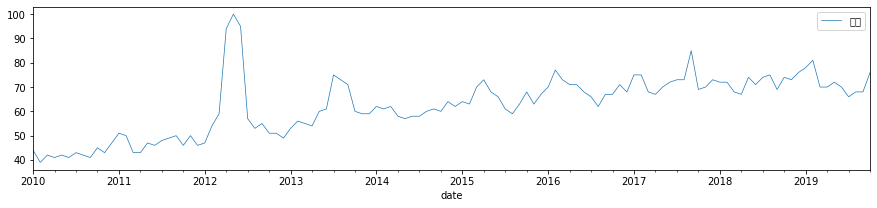

In [10]:
%matplotlib inline
from pytrends.request import TrendReq
# API Connection
pytrends = TrendReq(hl='ja-JP', tz=360)
# Set the search keyword
kw_list = ["医者"]
pytrends.build_payload(kw_list, timeframe='2010-01-01 2019-10-30', geo='JP')
df = pytrends.interest_over_time()
df.plot(figsize=(15, 3), lw=.7)

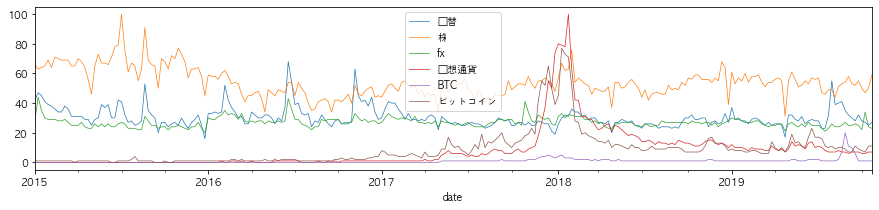

In [14]:
import pandas as pd
plt.rcParams['font.family'] = 'AppleGothic'

kw_list1 = ["為替","株","fx"]
kw_list2 = ["仮想通貨", "BTC", "ビットコイン"]

pytrends.build_payload(kw_list1, timeframe='2015-01-01 2019-10-30', geo='JP')
df1 = pytrends.interest_over_time()
pytrends.build_payload(kw_list2, timeframe='2015-01-01 2019-10-30', geo='JP')
df2 = pytrends.interest_over_time()
df = pd.concat([df1, df2], axis=1)
df.plot(figsize=(15, 3), lw=.7)

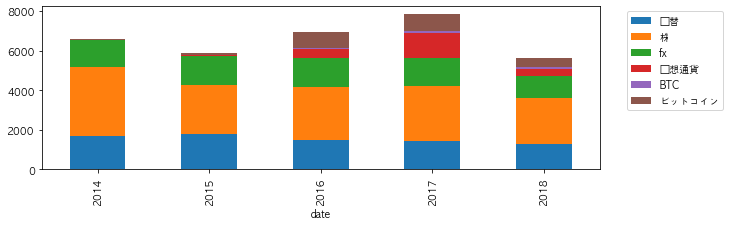

In [13]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np

yearly = df.resample('Y').sum().plot.bar(stacked=True, figsize=(10, 3))
plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018','2019'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

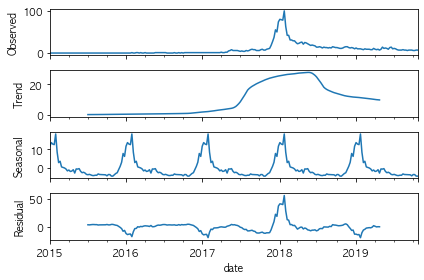

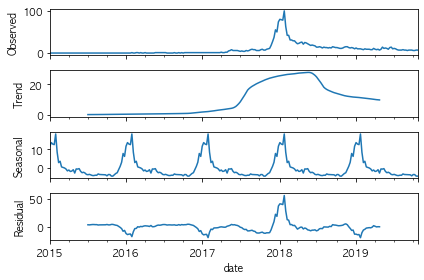

In [15]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df['仮想通貨'])
res.plot()

In [16]:
seasonality = pd.DataFrame()
for i in df.columns:
    res = sm.tsa.seasonal_decompose(df[i])
    seasonality = pd.concat([seasonality, res.trend], axis=1)

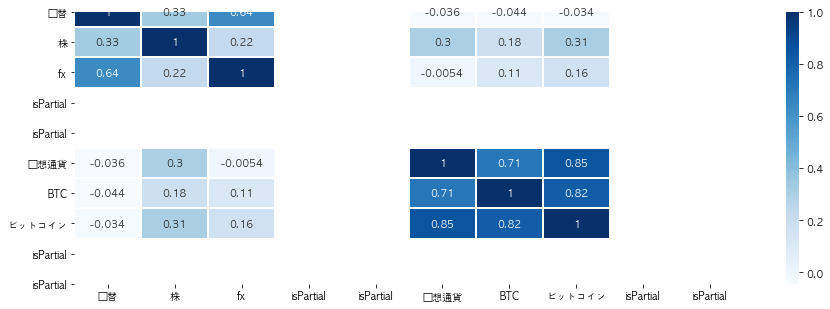

In [21]:
import seaborn as sns

resid = pd.DataFrame()
for i in df.columns:
    res = sm.tsa.seasonal_decompose(df[i])
    resid = pd.concat([resid, res.resid], axis=1)
cor_matrix = resid.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True, lw=0.7, cmap='Blues')